<a href="https://colab.research.google.com/github/MUKESH-SK/Machine-Learning-Deep-Learning-Projects/blob/main/ImageClassification_of_CIFAR10_using_AlexNet_Mukesh_S_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print(x_train.shape)

(50000, 32, 32, 3)


#Visualizing the dataset

1/1 [==============================] - 0s 187ms/step


<ipython-input-3-91b1f4d2a6af>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train_resized = np.asarray(x_train_resized, dtype = np.int)


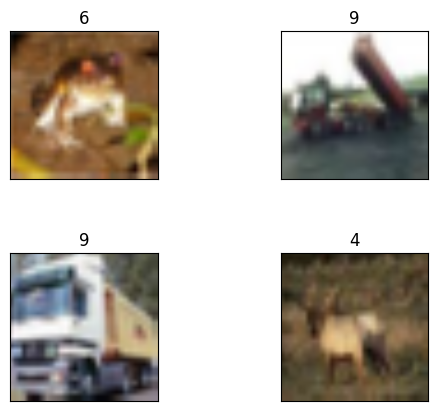

In [ ]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

from keras.layers import Lambda, Input
from keras.models import Model, Sequential
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


inp = Input(shape=(32, 32, 3))
out = Lambda(lambda image: tf.compat.v1.image.resize_images(image, (224, 224)))(inp)

model = Model(inputs=inp, outputs=out)

x_train_resized = model.predict(x_train[:32, ...])

# Visualization purposes
x_train_resized = np.asarray(x_train_resized, dtype = np.int)

# Let's visualize some examples
N=2
start_val = 0 # pick an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N,N)
items = list(range(0, 100))
for row in range(N):
  for col in range(N):
    idx = start_val+row+N*col
    axes[row,col].imshow(x_train_resized[idx], cmap='gray')
    fig.subplots_adjust(hspace=0.5)
    y_target = int(y_train[idx])
    target = str(items[y_target])
    axes[row,col].set_title(target)
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])
plt.show()


In [ ]:
num_classes = 10
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

print('Original training data shape: {}'.format(x_train.shape))
print('Training label shape: {}'.format(y_train.shape))

Original training data shape: (50000, 32, 32, 3)
Training label shape: (50000, 10)


# AlexNet Architecture

* AlexNet architecture consists of 5 convolutional layers, 3 max-pooling layers, 2 normalization layers, 3 fully connected layers, and 1 softmax layer.
* Each convolutional layer consists of convolutional filters and a nonlinear activation function ReLU.
* The pooling layers are used to perform max pooling.

In [ ]:
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential()

# Resize input image
model.add(Lambda(lambda x: tf.compat.v1.image.resize_images(x, (224, 224)), input_shape=(32,32,3)))

# 1st Convolutional Layer
model.add(Conv2D='valid')
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(10))
model.add(Activation('softmax'))

#Compile and Fit



In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=3)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/3
1563/1563 [==============================] - 57s 30ms/step - loss: 1.7580 - accuracy: 0.3404
Epoch 2/3
1563/1563 [==============================] - 48s 31ms/step - loss: 1.2983 - accuracy: 0.5330
Epoch 3/3
1563/1563 [==============================] - 48s 30ms/step - loss: 1.0737 - accuracy: 0.6185


# Loss and Accuracy

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.9992 - accuracy: 0.6473
Test loss: 0.9991609454154968
Test accuracy: 0.6473000049591064
